In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [57]:
data = pd.read_csv('./online_shoppers_intention.csv')

# The Meaning of the attributes

Administrative: This attribute contains information about the number of administrative pages (e.g., contact us, about us) that the user visited during the session.

Administrative_Duration: Represents the total time spent by the user on administrative pages during the session.

Informational: This attribute records the number of informational pages (e.g., product details, FAQs) that the user visited during the session.

Informational_Duration: Represents the total time spent by the user on informational pages during the session.

ProductRelated: Indicates the number of product-related pages (e.g., product listings, product categories) that the user visited during the session.

ProductRelated_Duration: Represents the total time spent by the user on product-related pages during the session.

Bounce Rate: The percentage of visitors who enter the website and leave without further interaction.

Exit Rate: The percentage of visitors who leave the website from a specific page.

Page Value: Represents the average value of a page that a user visited before completing an e-commerce transaction.

SpecialDay: Indicates the closeness of the specific session to a special day (e.g., Valentine's Day, Black Friday).

Month: Represents the month in which the session occurred.

OperatingSystem: The operating system used by the user.

Browser: The web browser used by the user.

Region: The geographic region of the user.

TrafficType: The type of traffic source that brought the user to the website (e.g., search engine, direct, referral).

VisitorType: Indicates whether the user is a new visitor, returning visitor, or other visitor types.

Weekend: A binary attribute indicating whether the session occurred on the weekend.

Revenue: The target variable that indicates whether the user made a purchase (1) or not (0).

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [59]:
column_names = data.columns

In [60]:
column_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [61]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

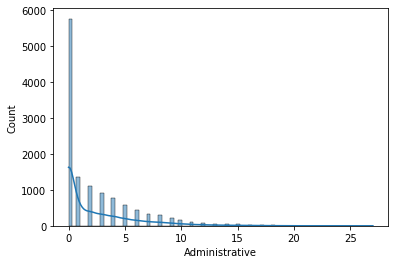

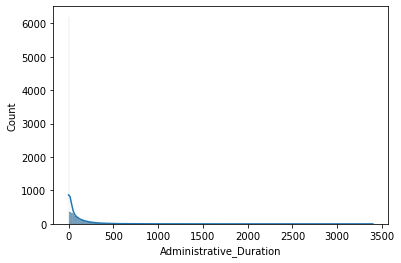

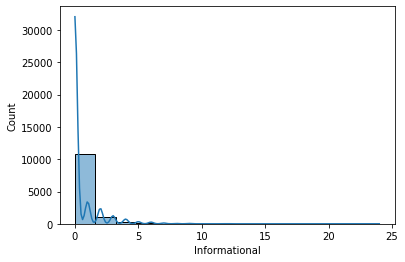

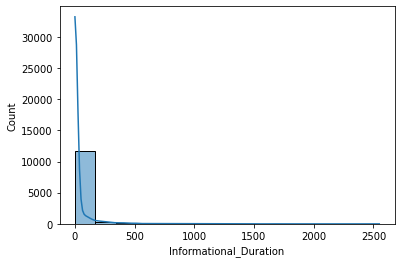

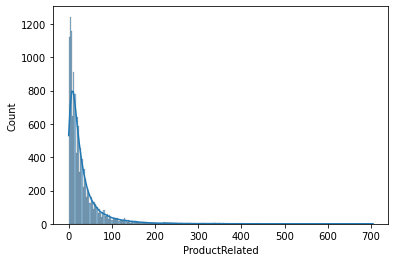

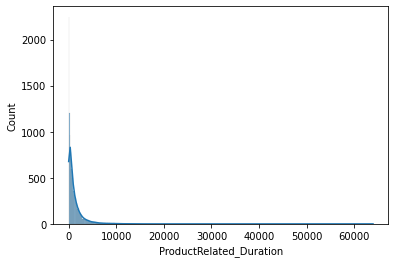

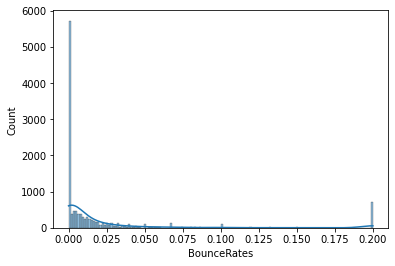

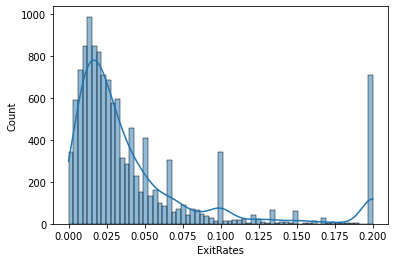

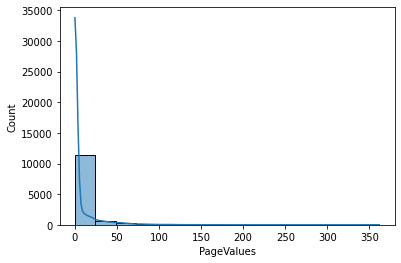

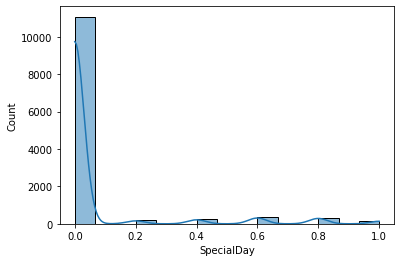

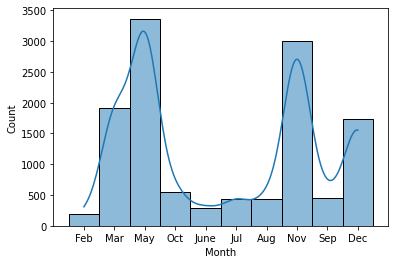

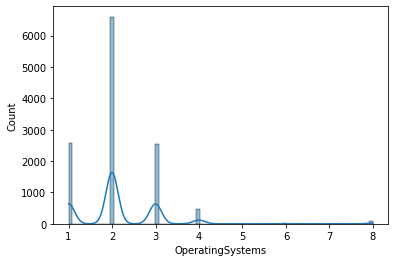

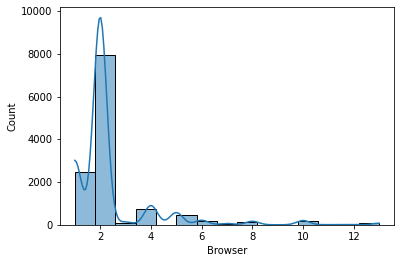

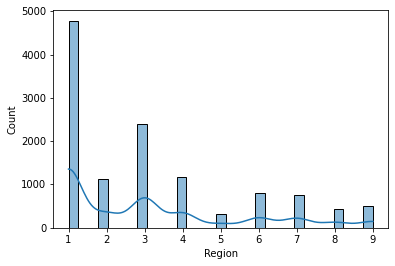

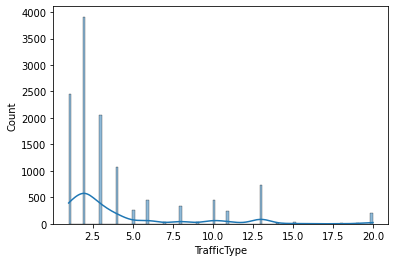

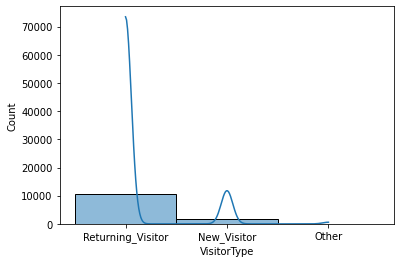

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


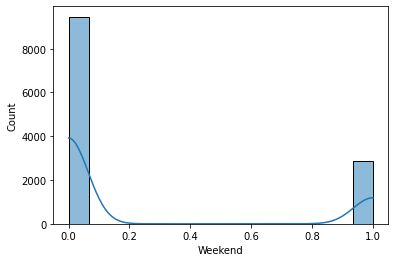

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


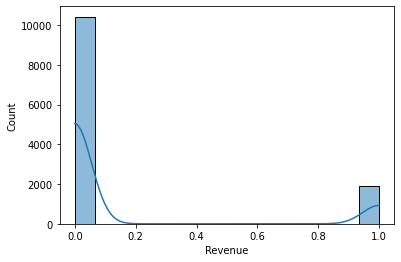

In [62]:
for i in range(len(column_names)):
    if column_names.dtype == 'int64':
        sns.histplot(data[column_names[i]])
    else:
        sns.histplot(data[column_names[i]], kde=True)
    plt.show()

<AxesSubplot:xlabel='Month'>

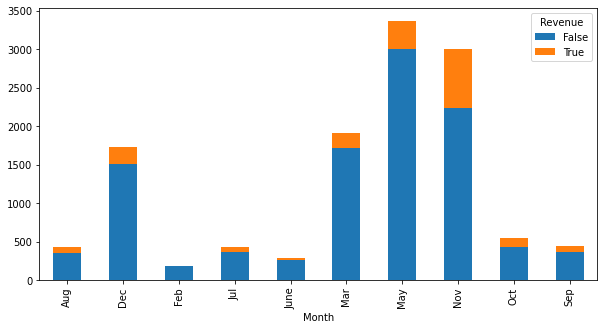

In [63]:
data.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

<AxesSubplot:xlabel='Weekend'>

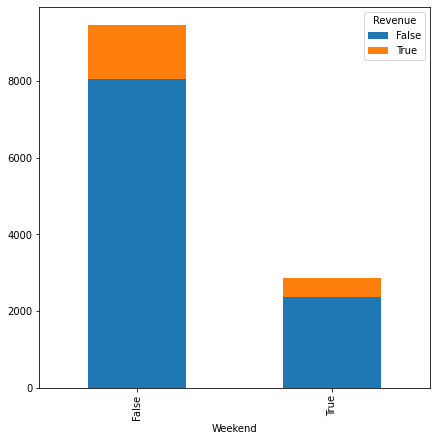

In [64]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:ylabel='count'>

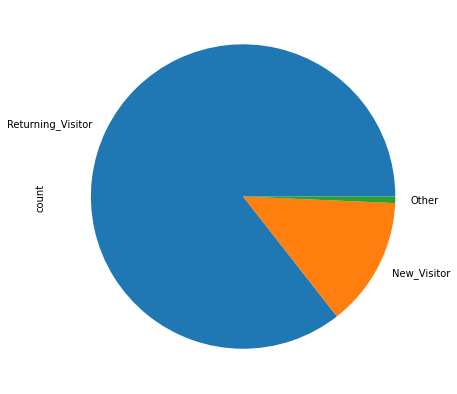

In [65]:
data['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<AxesSubplot:>

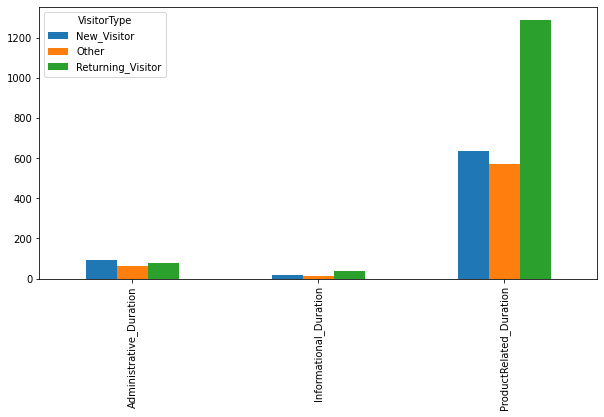

In [66]:
df_pvt=data[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

Counting the Number of duplicates

In [67]:
data.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [68]:
data.shape

(12330, 18)

In [69]:
data[data.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [70]:
data = data.drop_duplicates()

In [71]:
data.duplicated().value_counts()

False    12205
Name: count, dtype: int64

In [72]:
column_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [73]:
continous_values = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "BounceRates", "SpecialDay", "ExitRates", "PageValues"]

In [74]:
data[continous_values] = MinMaxScaler().fit_transform(data[continous_values])

In [77]:
data["PageValues"].min(), data["PageValues"].max()

(0.0, 1.0)

In [78]:
Month={'Jan':1, 'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data["Month"] = data["Month"].map(Month)

In [82]:
data["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [83]:
VisitorType = {"Returning_Visitor" : 1, "New_Visitor" : 2, "Other": 3}
data["VisitorType"] = data["VisitorType"].map(VisitorType)

In [84]:
data["VisitorType"].unique()

array([1, 2, 3], dtype=int64)

In [86]:
bool2val = {True : 1, False: 0}
data["Weekend"] = data["Weekend"].map(bool2val)
data["Revenue"] = data["Revenue"].map(bool2val)

<AxesSubplot:>

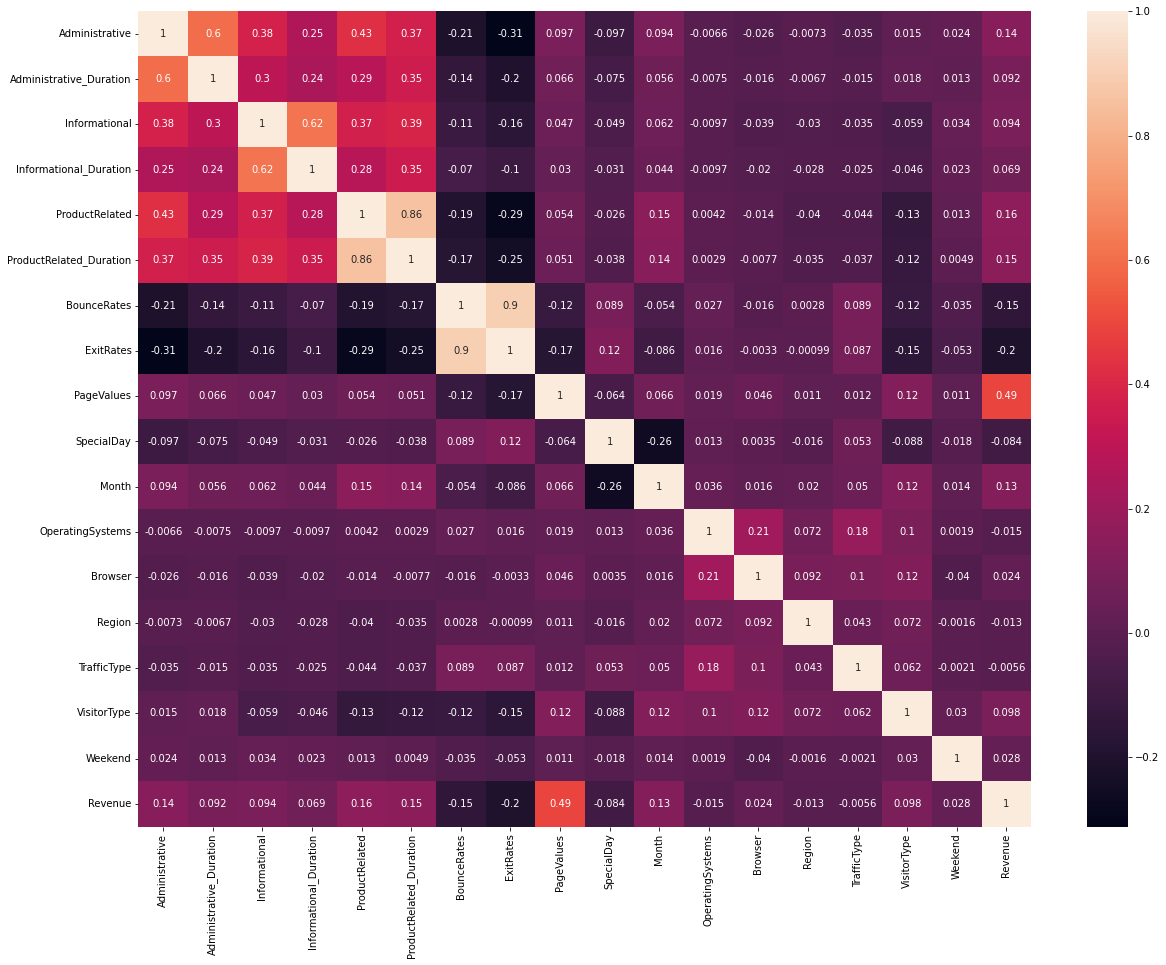

In [91]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True)

In [113]:
value = corr_mat.iloc[-1,:-1]

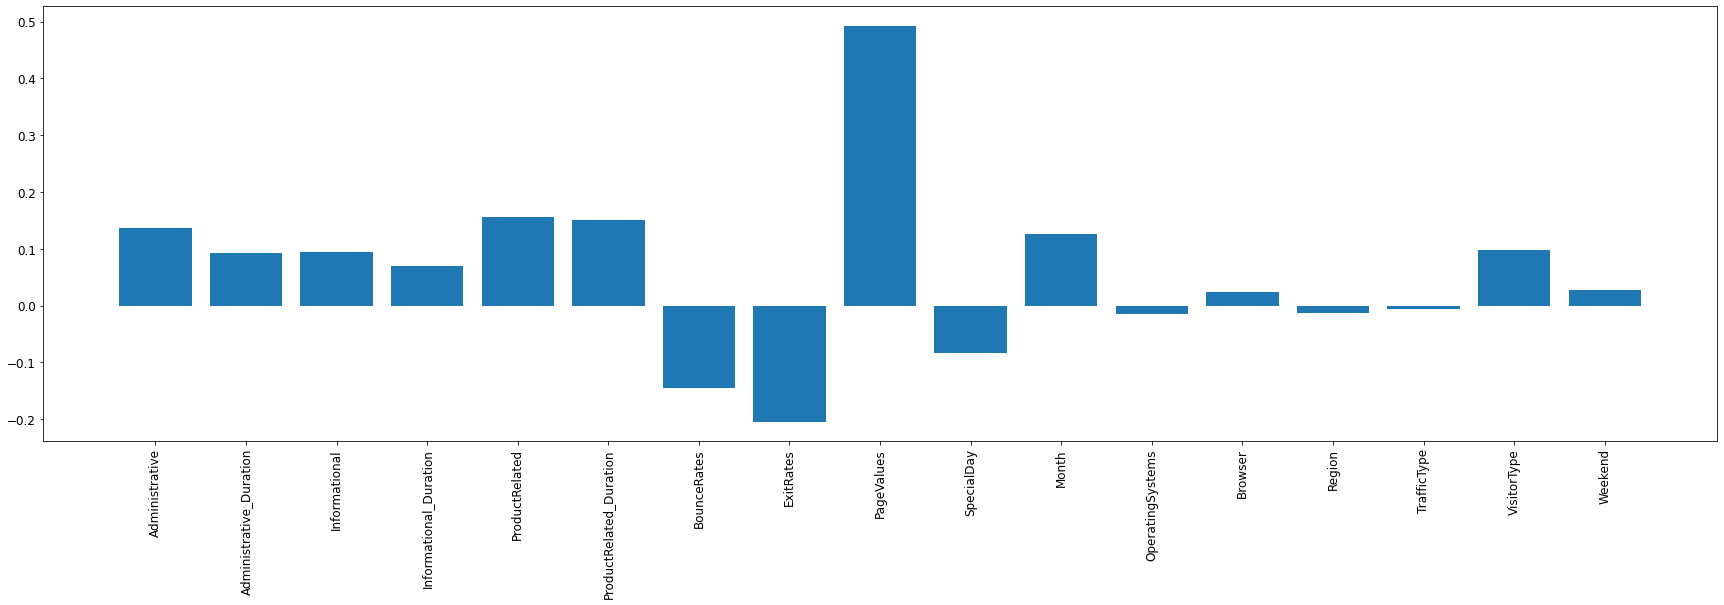

In [122]:
fig, ax = plt.subplots(figsize=(30,8))  
plt.bar(column_names[:-1],value)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 24})